In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

In [ ]:
#Make a directory named kaggle and copy the kaggle.json file there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# change the permission of the file
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d snap/amazon-fine-food-reviews

100% 241M/242M [00:07<00:00, 30.1MB/s]
100% 242M/242M [00:07<00:00, 34.6MB/s]


In [ ]:
#unzipping zip
from zipfile import ZipFile
file_name = 'amazon-fine-food-reviews.zip' #the file is your dataset exact name
with ZipFile(file_name, 'r') as zips:
  zips.extractall()
  print('Done')

Done


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#libraries used in the model: pandas
#reading csv file

def read_file_chunks(file_name):
  return pd.read_csv(file_name, chunksize =10000)

In [ ]:
#reading first chunk
df =read_file_chunks('Reviews.csv')

In [ ]:
#checking our DataFrame
next(df).head()
# df.shape
# df.columns

In [ ]:
#self analysis : can ignore this cell
# horrible, 
df =read_file_chunks('Reviews.csv')

pd.set_option("display.max_colwidth", 2)
i=0
for data in df:
  i +=10000
  # good =data['Summary'].str.find("wonderful")
  # good_bad =data[good >0]['Score'] ==1
  # print(data.loc[good_bad[good_bad ==True].index]['Summary'])
  # if i ==250000:
  #   print(data.loc[244580])
  print(data[data['Summary'] =='These "Butter Leaves" are addictively wonderful!'][['Score', 'Text']])

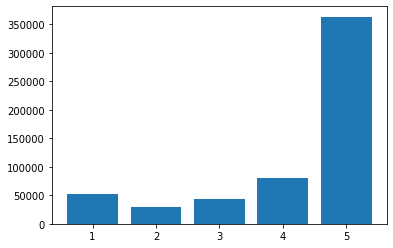

<Figure size 432x288 with 0 Axes>

In [ ]:
#visualizing the data

df =read_file_chunks('Reviews.csv')

dic ={'1':0, '2':0, '3':0, '4':0, '5':0}

def sore_count(obj):
  dic['1'] +=obj[obj ==1].count()
  dic['2'] +=obj[obj ==2].count()
  dic['3'] +=obj[obj ==3].count()
  dic['4'] +=obj[obj ==4].count()
  dic['5'] +=obj[obj ==5].count()

for chunk in df:
  chunk[['Score']].apply(sore_count)

plt.bar(dic.keys(), dic.values())
plt.show()
plt.clf()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'ea

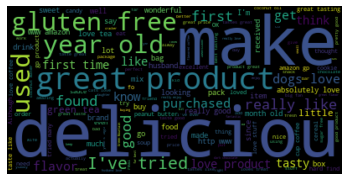

In [ ]:
#make a wordcloud for entire data
df =read_file_chunks('Reviews.csv')

#removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud
STOPWORDS =stopwords.words()
print(stopwords.words('english'))

#find more stopwords
# for chunk in df:
#   print(chunk[chunk['Text'].str.find('<a') >0])

#stopwords to add : <br />, <p>, </p>, <a, href
#after run add stopwords : 'use', 'got', 'th', 'ordered', 'bought'
STOPWORDS.extend(['br', '<p>', '</p>', '<a', 'href', 'use', 'got', 'th', 'ordered', 'bought'])
# print(STOPWORDS)

#extracting non stopwords from 'Text' column
text = " ".join(chunk.Text.to_string() for chunk in df)
wordcloud =WordCloud(stopwords=STOPWORDS).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
df =read_file_chunks('Reviews.csv')
#we use header only once i.e. at the start i.e. on the first chunk
#if we forget this header will be appended at every chunk.
#Therefore increasing number of records

header =True
for chunk in df:
  chunk['Sentiment'] = np.where(chunk['Score']<=2, -1, chunk['Score'])
  chunk['Sentiment'] = np.where(chunk['Sentiment']==3, 0, chunk['Sentiment'])
  chunk['Sentiment'] = np.where(chunk['Sentiment']>=4, 1, chunk['Sentiment'])
  #first delete then append
  chunk.to_csv("new_file_Reviews.csv",index =False, header =header, mode='a')
  header =False

df =read_file_chunks('new_file_Reviews.csv')
next(df).head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,-1
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1


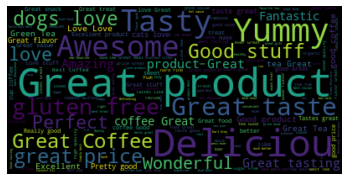

In [ ]:
#good reviews
df =read_file_chunks('new_file_Reviews.csv')
text = " ".join(chunk[chunk['Sentiment'] ==1].Summary.to_string() for chunk in df)
wordcloud =WordCloud(stopwords=STOPWORDS).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

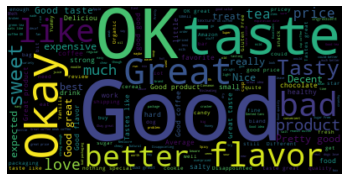

In [ ]:
#neutral reviews
df =read_file_chunks('new_file_Reviews.csv')
text = " ".join(chunk[chunk['Sentiment'] ==0].Summary.to_string() for chunk in df)
wordcloud =WordCloud(stopwords=STOPWORDS).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

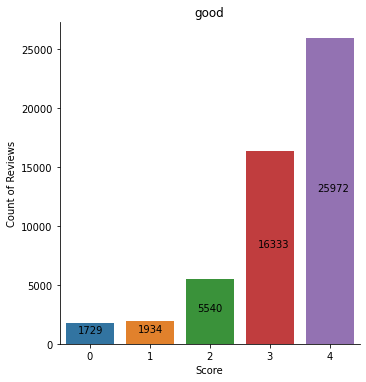

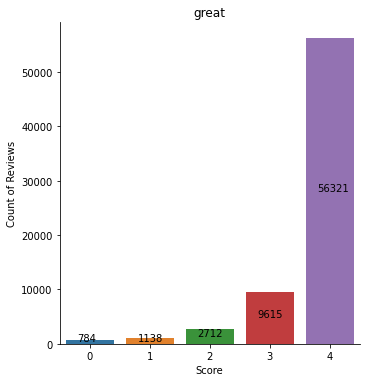

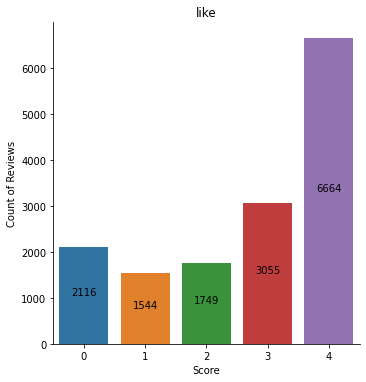

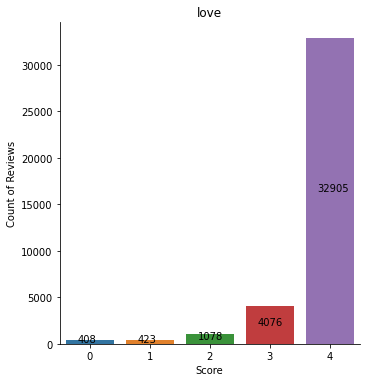

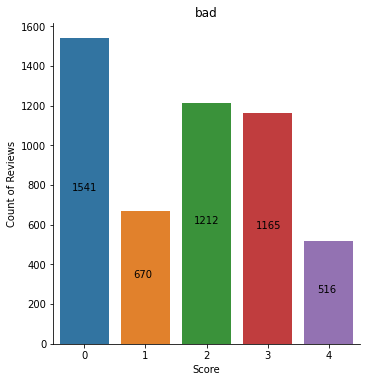

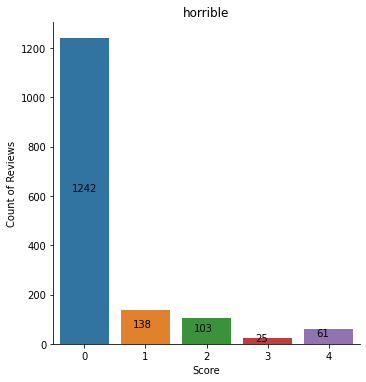

In [ ]:
#visualizing data wrt words

words ={'good': [0]*5, 'great': [0]*5, 'like': [0]*5, 'love': [0]*5, 'bad': [0]*5, 'horrible': [0]*5}
i =0

def word_search(obj):
  #getting obj from score =1 to score =5 i.e. asc order
  global words, i
  for key, values in words.items():
    words[key][i] +=obj[obj.str.lower().str.find(key) >=0].count()
  i +=1

df =read_file_chunks('Reviews.csv')

for chunk in df:
  i =0
  chunk.groupby('Score')['Summary'].agg(word_search)
  # break

df_words =pd.DataFrame(words)
#nested loops
for data in df_words.columns:
  p =sns.catplot(x= df_words.index,
              y = df_words[data].values,
              data =df_words,
              kind ='bar'
              )
  for ind, val in enumerate(df_words[data].values):
    p.ax.annotate(val,
                  xy =(ind, val),
                  xytext =(ind-0.20, val/2))
  p.set(xlabel ="Score", ylabel = "Count of Reviews", title =data)
  plt.show()
# words

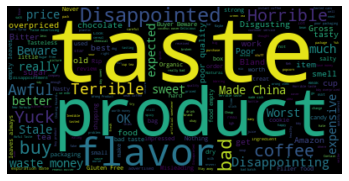

In [ ]:
#bad reviews
df =read_file_chunks('new_file_Reviews.csv')
STOPWORDS.extend(['good', 'great', 'like', 'love'])
text = " ".join(chunk[chunk['Sentiment'] ==-1].Summary.to_string() for chunk in df)
wordcloud =WordCloud(stopwords=STOPWORDS).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
#identifying if Summary or Text is null
df =read_file_chunks('new_file_Reviews.csv')
for chunk in df:
  print(chunk[chunk.Text.isna()].Score)

In [ ]:
#removing punctuations and getting the data that we will work on ready in file
df =read_file_chunks('new_file_Reviews.csv')
STOPWORDS = [word for word in STOPWORDS if word not in ['good', 'great', 'like', 'love']]
def remove_punctuation(text):
    # print(text)
    final = "".join(u for u in str(text) if u not in ("?", ".", ";", ":",  "!",'"'))
    return final

def remove_stopwords(text):
  # print(text)
  text =text.lower()
  for word in STOPWORDS:
    text =text.replace(" " +word +" ", ' ')
  return text

#why use header...see new_file_Reviews creation in above cells
header =True
for chunk in df:
  chunk['Text'] = chunk['Text'].apply(remove_punctuation)
  # chunk['Text'] = chunk['Text'].apply(remove_stopwords)
  chunk = chunk.dropna(subset=['Summary'])
  chunk['Summary'] = chunk['Summary'].apply(remove_punctuation)
  # chunk['Summary'] = chunk['Summary'].apply(remove_stopwords)
  chunk[['Sentiment', 'Summary', 'Text']].to_csv("Summary_Text_Sentiment.csv",index =False, header =header, mode='a')
  header =False
  # break

In [ ]:
#checking if files have consistant records
df =read_file_chunks('Summary_Text_Sentiment.csv')
i=0
for chunk in df:
  i +=chunk.shape[0]

print(i)
print(len(STOPWORDS))

In [ ]:
df =read_file_chunks('Summary_Text_Sentiment.csv')
next(df).head(10)

,Sentiment,Summary,Text
0,1,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,-1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,1,Delight says it all,This is a confection that has been around a fe...
3,-1,Cough Medicine,If you are looking for the secret ingredient i...
4,1,Great taffy,Great taffy at a great price There was a wide...
5,1,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,1,Great Just as good as the expensive brands,This saltwater taffy had great flavors and was...
7,1,"Wonderful, tasty taffy",This taffy is so good It is very soft and che...
8,1,Yay Barley,Right now I'm mostly just sprouting this so my...
9,1,Healthy Dog Food,This is a very healthy dog food Good for their...


In [ ]:
#Train & Test split
from sklearn.model_selection import train_test_split

df =read_file_chunks('Summary_Text_Sentiment.csv')
#X is data and Y is target
header =True
for chunk in df:
  X_train, X_test, Y_train, Y_test =train_test_split(chunk['Summary'],
                                                     chunk['Sentiment'],
                                                     test_size =.2,
                                                     random_state =21,
                                                     stratify =chunk['Sentiment']
                                                     )
  X_train.to_csv("X_train.csv",index =False, header =header, mode='a')
  X_test.to_csv("X_test.csv",index =False, header =header, mode='a')
  Y_train.to_csv("Y_train.csv",index =False, header =header, mode='a')
  Y_test.to_csv("Y_test.csv",index =False, header =header, mode='a')
  header =False

In [ ]:
temp_ytrain =pd.read_csv("Y_train.csv")
# temp_xtrain.head()
print("P(+1) = ", temp_ytrain.query('Sentiment ==+1').shape[0]/temp_ytrain.shape[0])
print("P(0) = ", temp_ytrain.query('Sentiment ==0').shape[0]/temp_ytrain.shape[0])
print("P(-1) = ", temp_ytrain.query('Sentiment ==-1').shape[0]/temp_ytrain.shape[0])

P(+1) =  0.7807125374663819
P(0) =  0.07501412892173787
P(-1) =  0.14427333361188016


In [ ]:
#deleting unnecessary files
import os
# os.remove("Summary_Text_Sentiment.csv")
os.remove("new_file_Reviews.csv")
os.remove("Reviews.csv")

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train =pd.read_csv("X_train.csv")
test =pd.read_csv("X_test.csv")
train_matrix = vectorizer.fit_transform(train['Summary'].values.astype('str'))
test_matrix = vectorizer.transform(test['Summary'].values.astype('str'))

bag_of_words = pd.DataFrame(train_matrix[0:7].toarray(),
                      columns=vectorizer.get_feature_names())
bag_of_words
# train['Summary'].values[0:5]

,0,00,000,001,008,013oz,019,02,020,03,04,042oz,043,045,05,06,060,0610,062,06202,0625,0631,069,07,075,078,08,081,088,09,090212,097,0f,0g,0ne,0s,0z,1,10,100,...,zombies,zomg,zone,zonkers,zoo,zoology,zoom,zooom,zot,zots,zotz,zours,zow,zowie,zqueen,zsweet,zu,zucchini,zuckerman,zuke,zukes,zulka,zulu,zuma,zupreem,zushi,zw,zweibach,zwieback,zylitol,zym,zyrup,zz,zzfantastic,zzzzs,zzzzz,zzzzzzzzz,zzzzzzzzzzz,½,åwesome
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# count vectorizer:
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.metrics import confusion_matrix,classification_report

# vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
# def func(text):
  # k =[word for word in text]
  # text ="".join(str(text.values))
  # final = "".join(u for u in str(text) if u not in ("'"))
  # return final

# Y_train = read_xy_chunk('Y_train.csv')
# X_train = read_xy_chunk('X_train.csv')
# for chunk, y in zip(X_train, Y_train):
  # print(chunk.apply(func))
  # break chunk.apply(func)
  # train_matrix =vectorizer.fit_transform(chunk.Summary.values.astype('str'))
  # print(vectorizer.get_feature_names())
  # print(train_matrix.toarray())
  # print(train_matrix.shape, y.shape)
#   lr.fit(train_matrix, y['Sentiment'])

# X_test = read_xy_chunk('X_test.csv')
# Y_test = read_xy_chunk('Y_test.csv')

# for chunk, y in zip(X_test, Y_test):
#   test_matrix =vectorizer.fit_transform(chunk.Summary.values.astype('str'))
#   predictions = lr.predict(chunk.Summary.values.astype('str'))
#   new = np.asarray(y)
#   print(confusion_matrix(predictions,y))
# print(train_matrix)

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
X_train = train_matrix
X_test = test_matrix
y_train = pd.read_csv("Y_train.csv")['Sentiment']
y_test = pd.read_csv("Y_test.csv")['Sentiment']

In [ ]:
lr.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions = lr.predict(X_test)

In [ ]:
# find accuracy, precision, recall:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

array([[10631,  1907,  2045],
       [  612,  1920,   949],
       [ 5162,  4699, 85761]])

In [ ]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

          -1       0.65      0.73      0.69     14583
           0       0.23      0.55      0.32      3481
           1       0.97      0.90      0.93     95622

    accuracy                           0.86    113686
   macro avg       0.61      0.73      0.65    113686
weighted avg       0.90      0.86      0.88    113686



In [ ]:
arr =vectorizer.transform(['These "Butter Leaves" are addictively wonderful!'])
predictions = lr.predict(arr)
print(predictions)

[1]


In [ ]:
# !pip install django==1.11.17
# !apt install python3.7
# !python3.7 --version

#fitting model
X_train = train_matrix
X_test = test_matrix
Y_train = pd.read_csv('Y_train.csv')
Y_test = read_xy_chunk('Y_test.csv')

# for X_chunk, Y_chunk in zip(X_train, Y_train):
#   print(X_chunk)
# print(X_train.shape, Y_train.shape)
lr.fit(X_train, Y_train)

In [ ]:
#making prediction on original data
df =pd.read_csv('Summary_Text_Sentiment.csv', usecols =['Sentiment', 'Summary'])
arr =vectorizer.transform(df['Summary'].values.astype('str'))
df['Predicted_Sentiment'] = lr.predict(arr)
# print(len(predictions), df.shape[0])
# df['Summary'].values[0:4]


In [ ]:
df.head()

,Sentiment,Summary,Predicted_Sentiment
0,1,Good Quality Dog Food,1
1,-1,Not as Advertised,-1
2,1,Delight says it all,1
3,-1,Cough Medicine,-1
4,1,Great taffy,1


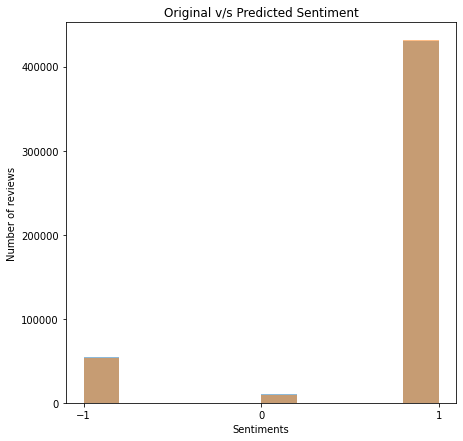

<Figure size 432x288 with 0 Axes>

In [ ]:
fig, ax =plt.subplots(figsize =[7, 7])
ax.hist(df['Sentiment'], label ='Original Sentiment', alpha =0.5)
ax.hist(df['Predicted_Sentiment'], label ='Predicted Sentiment', alpha =0.5)

plt.xticks(range(-1, 2))

plt.xlabel("Sentiments")
plt.ylabel("Number of reviews")
plt.title("Original v/s Predicted Sentiment")

plt.show()
plt.clf()

In [ ]:
df.query('Sentiment != Predicted_Sentiment').to_csv("Sentiment_mismatch.csv",index =False, header =True)

(73820, 3)

In [ ]:
temp_df =pd.read_csv('Sentiment_mismatch.csv')
temp_df.head()
# temp_df.shape

(73820, 3)

In [ ]:
df =df.drop(df.query('Sentiment != Predicted_Sentiment').index)

In [ ]:
494607+73820

In [ ]:
os.remove("Summary_Text_Sentiment.csv")
df.to_csv("Summary_Text_Sentiment.csv", index =False, header =True)

In [ ]:
os.remove("X_test.csv")
os.remove("X_train.csv")
os.remove("Y_test.csv")
os.remove("Y_train.csv")

In [ ]:
#predict for mismatched values
df =pd.read_csv('Sentiment_mismatch.csv', usecols =['Sentiment', 'Summary'])
arr =vectorizer.transform(df['Summary'].values.astype('str'))
df['Predicted_Sentiment'] = lr.predict(arr)
# print(len(predictions), df.shape[0])
# df['Summary'].values[0:4]


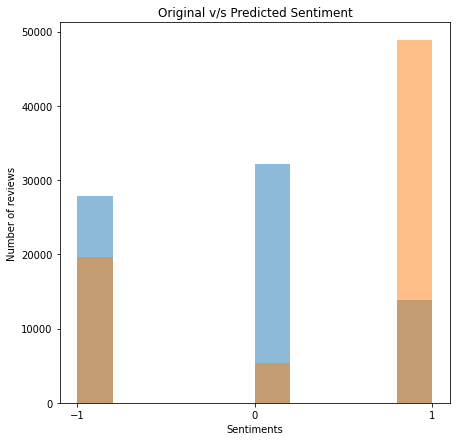

<Figure size 432x288 with 0 Axes>

In [ ]:
fig, ax =plt.subplots(figsize =[7, 7])
ax.hist(df['Sentiment'], label ='Original Sentiment', alpha =0.5)
ax.hist(df['Predicted_Sentiment'], label ='Predicted Sentiment', alpha =0.5)

plt.xticks(range(-1, 2))

plt.xlabel("Sentiments")
plt.ylabel("Number of reviews")
plt.title("Original v/s Predicted Sentiment")

plt.show()
plt.clf()

In [ ]:
arr =vectorizer.transform(["The entire session went well. Looking forward towards the upcoming sessions. "])
lr.predict(arr)

array([1])